<a href="https://colab.research.google.com/github/Ismail-Armutcu/Algorithms-for-Interactive-Sytems/blob/main/MazePathFinding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MMI-513 Programming Assignment #3**
# Procedural Content Generation
## Maze Generation
### Prims Maze Implementation

- İsmail Hakkı Armutcu
- 2374395



- Preamble is where we import the Python modules that we will use

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.ndimage import gaussian_filter

plt.rcParams['figure.figsize'] = [7.5, 7.5] # This is to adjust the image size on Jupyter

- Utility functions for undirected connectection graph function

In [10]:
  def undirectedconnectiongraph(xnum=30, ynum=30):
    G = {'V':[], 'E':[]} # We will use a dictionary for simplicity
    for xind in range(xnum):
      for yind in range(ynum):
        G['V'].append((xind, yind))

    # Traverse north first
    for pt in G['V']:
      vtn = north(pt[0], pt[1])
      if isvertex(vtn, G['V']):
        G['E'].append((pt, vtn))

    # Traverse east second
    for pt in G['V']:
      vte = east(pt[0], pt[1])
      if isvertex(vte, G['V']):
        G['E'].append((pt, vte))
    return G

  def north(xind, yind):
    node = (xind, yind + 1)
    return node

  def south(xind, yind):
    node = (xind, yind - 1)
    return node

  def east(xind, yind):
    node = (xind + 1, yind)
    return node

  def west(xind, yind):
    node = (xind - 1, yind)
    return node

  def isvertex(node, vertices):
    return node in vertices

  def randomnode(vertices):
    vertices = list(vertices)
    randind = np.random.randint(0, len(vertices))
    return vertices[randind]

# Utility functions for Prims Maze algorithm

In [11]:
def inSet(element,Set):  # Determine if the given element is in the given set
  for s in Set:          # Returns true if found
    if(element == s):
      return True
  return False

def endIntersect(set1,set2): # Determine if two given ends intersects
  count =0
  for s1 in set1:
    for s2 in set2:
      if(s1 == s2):
         count += 1
  return count

def intersectionSize(l, C): # Determine the intersection length
  count = 0
  if(inSet(l[0],C)):
    count +=1
  if(inSet(l[1],C)):
    count +=1
  return count

## Prims Maze

In [12]:
def pimmsmaze(xnum=30, ynum=30):
  assert(type(xnum) == int and type(ynum) == int) # Assertions
  assert(xnum > 0 and ynum > 0)                   # Both inputs must be positive integers

  G = undirectedconnectiongraph(xnum, ynum)       # Construct the undirected connection graph with the given parameters
  W = set(G['E'].copy())                          # Initialize walls
  V = set(G['V'].copy())                          # Initialize edges

  L = set()                                       # Set of walls to check out, initally empty
  C = set()                                       # Visited Cells, initally empty
  c = randomnode(V)                               # select c in V randomly

  for w in W:                                     # Initalize L with the neighbors of c
    if(inSet(c,w)):
      L.add(w)

  while len(L):
    l = randomnode(L)                           # Select l in L randomly
    if(intersectionSize(l,C) <=1):                          # |ends(l) n C| <=1
      C.add(l[0])                               # C <- C u ends(l)
      C.add(l[1])
      W.remove(l)                               # Remove the wall
      for w in W:
        if(endIntersect(l,w)):
          if(inSet(w,L) != True):
            L.add(w)                          # Add the neighbouring walls
    L.remove(l)

  P = {'V':[], 'E':[]}
  P['V'] = G['V'].copy()
  P['E'] = list(W)
  return P

# Plotting the Prims Maze

In [13]:
def getWalls(P):
  walls = []
  for e in P['E']:
      vec = np.array([e[1][0]-e[0][0], e[1][1]-e[0][1]])
      ort = np.array([-vec[1], vec[0]])
      olen = np.linalg.norm(ort)
      ort = ort / olen
      sum = np.array([(e[1][0]+e[0][0])/2, (e[1][1]+e[0][1])/2])
      startp = sum - ort / 2
      endp = sum + ort / 2
      walls.append(((startp[0], startp[1]), (endp[0], endp[1])))
  return walls
def removeedges(edges,walls):
  for w in walls:
    x = w[0]
    y = w[1]
    ort = ((x[0]+y[0])/2,(x[1]+y[1])/2)
    if(x[0] == y[0]):##vertical
      edges.remove(((ort[0]-0.5,ort[1]),(ort[0]+0.5,ort[1])))
    else:
      edges.remove(((ort[0],ort[1]-0.5),(ort[0],ort[1]+0.5)))

  return edges
def plotgraph(vertices, edges): ## Plots the graph with edge weights in manhattan weight
  x, y = [], []
  for v in vertices:
    x.append(v[0])
    y.append(v[1])

  plt.scatter(np.array(x), np.array(y))
  plt.axis('equal')  # Equal aspect ratio
  for e in edges:
    plt.plot([e[0][0], e[1][0]], [e[0][1], e[1][1]], 'm')
    x = (e[0][0]+e[1][0])/2
    y = (e[0][1]+e[1][1])/2
    ## Weight of an edge in manhattan metric

def plotwalls(vertices, edges): ## Plots the graph with edge weights in manhattan weight
  x, y = [], []
  for v in vertices:
    x.append(v[0])
    y.append(v[1])
  plt.axis('equal')  # Equal aspect ratio
  for e in edges:
    plt.plot([e[0][0], e[1][0]], [e[0][1], e[1][1]], 'k',linewidth=10)

def plotPath(vertices,edges,start,end): ## Plots the calculated path from the start and end vertices
  x, y = [], []
  for v in vertices:
    x.append(v[0])
    y.append(v[1])
    plt.scatter(np.array(x), np.array(y))
    plt.axis('equal')  # Equal aspect ratio
  for e in edges:
    plt.plot([e[0][0], e[1][0]], [e[0][1], e[1][1]], 'k')
    plt.text(start[0], start[1], 'Start', verticalalignment='bottom', horizontalalignment='right', color='blue')
    plt.text(end[0], end[1], 'End', verticalalignment='bottom', horizontalalignment='right', color='blue')
## A matrix class to store the distance between vertices this class implements g(s->r) function in A-Star and distance function in Dijkstra
class weightMatrix:
    def __init__(self,vertices):
      self.vertices = vertices
      self.matrix = []
      for i in range(len(vertices)):
        self.matrix.append([np.inf]*len(vertices))

    def __getitem__(self, index):
        s,v = index
        return self.matrix[self.vertices.index(s)][self.vertices.index(v)]

    def __setitem__(self, index, value):
        s,v = index
        self.matrix[self.vertices.index(s)][self.vertices.index(v)] = value

#Heuristic measure takes the max of the vertical
#and horizontal distance to goal vertex
def h(v,r):
  return max(abs(r[0]-v[0]),abs(r[1]-v[1]))

#Weight of and edge in manhattan metric
def manhattanDistance(v,u):
  return abs(v[0]-u[0])+ abs(v[1]-u[1])

#Return the vertices that can be accessed from the selected vertice, similar to neighbour
def getSuccessors(selectedVertice,edges,vertices):
  successorList = []
  for e in edges:
    if(e[0] == selectedVertice and e[1] in vertices):
      if(not(e[1] in successorList)):
        successorList.append(e[1])
    elif(e[1] == selectedVertice and e[0] in vertices):
      if(not(e[0] in successorList)):
        successorList.append(e[0])
  return successorList

def calculatePathFromMapping(res,s,r): ## Calculate the path from the result of A* or Dijkstra Algorithm
  prev = res[r]
  steps = []
  steps.append(r)
  steps.append(prev)
  while(prev != s):
    prev = res[prev]
    steps.append(prev)

  travelledEdges = []
  for i in range(len(steps)-1):
    travelledEdges.append(((steps[i]),(steps[i+1])))
  return steps,travelledEdges
def aStar(vertices,edges,s,r):
  g = weightMatrix(vertices) #function g(s->v)
  S = []  #OpenList S
  pi = {} #Mapping pi: V -> V
  for v in vertices:
    pi[v] = None
    g[s,v] = np.inf
  g[s, s] = 0
  S.append(s)
  g[s,r] = h(s,r) ## Precalculate h(s,r)
  selectedVertice = s ##First start with the starting vertice
  while len(S) != 0:
    minWeight = np.inf
    for vPrime in S:  ##Find the vertice that minimizes g[s,vPrime]+ h(vPrime,r)
      if(vPrime != s):
        if((g[s,vPrime]+ h(vPrime,r) )< minWeight ):
          minWeight = g[s,vPrime]+ h(vPrime,r)
          selectedVertice = vPrime

    if(selectedVertice == r and g[selectedVertice,r]< np.inf): ## If the target vertice is reached, terminate
      return pi

    if(selectedVertice in S): ## S <- S \ {v}
       S.pop(S.index(selectedVertice))

    for u in getSuccessors(selectedVertice,edges,vertices): ## For each successor of selectedVertice
      if(pi[u] == None): ## If it is NIL then open u
        if(not (u in S)): ## S <- S U {u}
          S.append(u)
        g[s,u] = g[s,selectedVertice] + manhattanDistance(selectedVertice,u) ## Update the weight
        pi[u] = selectedVertice   ##Update the mapping
        g[u,r] = h(u,r)   ##Precalculate h(u,r)

      elif((u in S) and ((g[s,selectedVertice] + manhattanDistance(selectedVertice,u)) < g[s,u])): ## g(s->v) + weight(v,u) < g(s->u) then open u
        if(not (u in S)): ## S <- S U {u}
          S.append(u)
        g[s,u] = g[s,selectedVertice] + manhattanDistance(selectedVertice,u) ## Update the weight
        pi[u] = selectedVertice ##Update the mapping
        g[u,r] = h(u,r) ##Precalculate h(u,r)

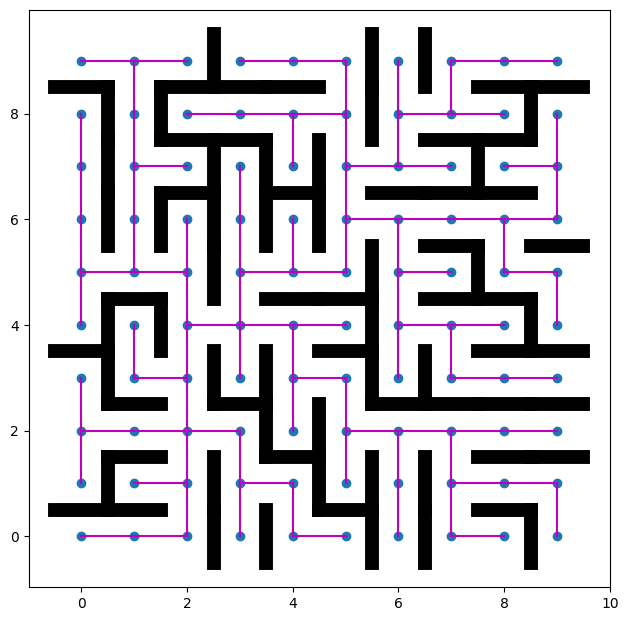

In [14]:
dim = 10
P = pimmsmaze(dim, dim)
G = undirectedconnectiongraph(dim, dim)
edges = G['E']
vertices = P['V']
walls = getWalls(P)
graph = removeedges(edges,walls)
plotgraph(vertices,graph)
plotwalls(vertices,walls)


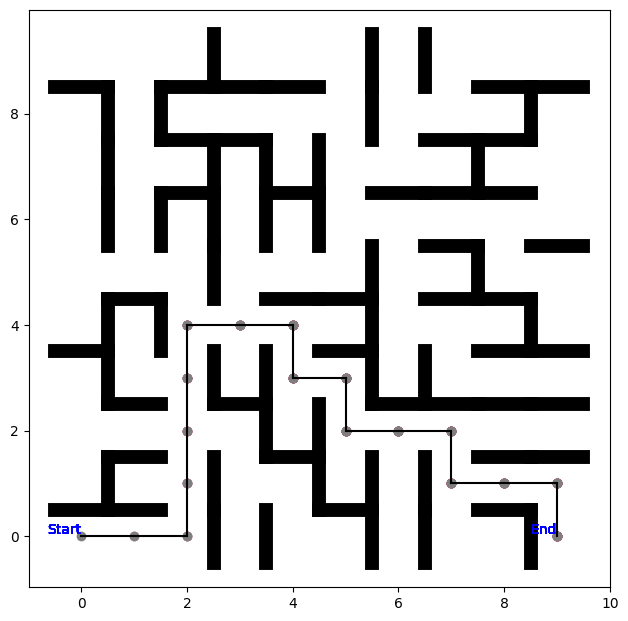

In [17]:
start = (0,0)
end = (9,0)
result = aStar(vertices,graph,start,end)
steps,travelledEdges = calculatePathFromMapping(result,start,end)

plotwalls(vertices,walls)
plotPath(steps, travelledEdges,start,end)